In [11]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [12]:
incomeblocksgdf = gpd.read_file('Income Blocks.geojson')

In [13]:
incomeblocksgdf.head()

,geoid,block name,median income,geometry
0,15000US060014001001,"Block Group 1, Alameda, CA",219861.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,15000US060014002001,"Block Group 1, Alameda, CA",237500.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,15000US060014002002,"Block Group 2, Alameda, CA",162583.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,15000US060014003001,"Block Group 1, Alameda, CA",183482.0,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,15000US060014003002,"Block Group 2, Alameda, CA",101736.0,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."


In [15]:
incomeblocksgdf.sort_values(by='median income',ascending=False)

,geoid,block name,median income,geometry
1,15000US060014002001,"Block Group 1, Alameda, CA",237500.0,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
96,15000US060014042002,"Block Group 2, Alameda, CA",235750.0,"MULTIPOLYGON (((-122.23772 37.84090, -122.2376..."
103,15000US060014044003,"Block Group 3, Alameda, CA",232105.0,"MULTIPOLYGON (((-122.21546 37.84139, -122.2154..."
95,15000US060014042001,"Block Group 1, Alameda, CA",229773.0,"MULTIPOLYGON (((-122.23661 37.84110, -122.2364..."
98,15000US060014043001,"Block Group 1, Alameda, CA",227538.0,"MULTIPOLYGON (((-122.24540 37.84580, -122.2449..."
...,...,...,...,...
53,15000US060014024002,"Block Group 2, Alameda, CA",18833.0,"MULTIPOLYGON (((-122.28401 37.80911, -122.2839..."
55,15000US060014025002,"Block Group 2, Alameda, CA",17744.0,"MULTIPOLYGON (((-122.28865 37.80281, -122.2885..."
63,15000US060014030002,"Block Group 2, Alameda, CA",17593.0,"MULTIPOLYGON (((-122.27500 37.79842, -122.2749..."
266,15000US060014088003,"Block Group 3, Alameda, CA",15893.0,"MULTIPOLYGON (((-122.19821 37.76041, -122.1978..."


<AxesSubplot:>

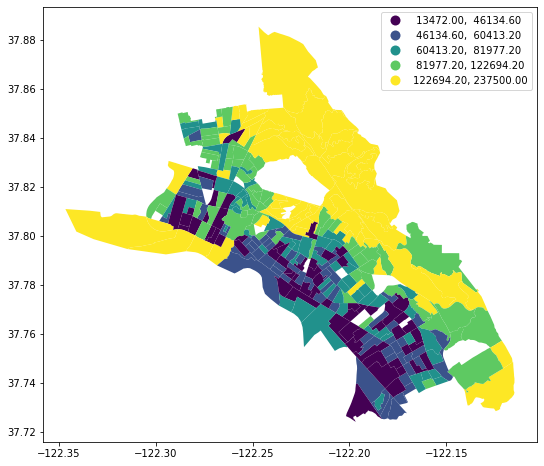

In [18]:
incomeblocksgdf.plot(figsize=(10,8),
                 column='median income',
                 legend=True, 
                 scheme='Quantiles')

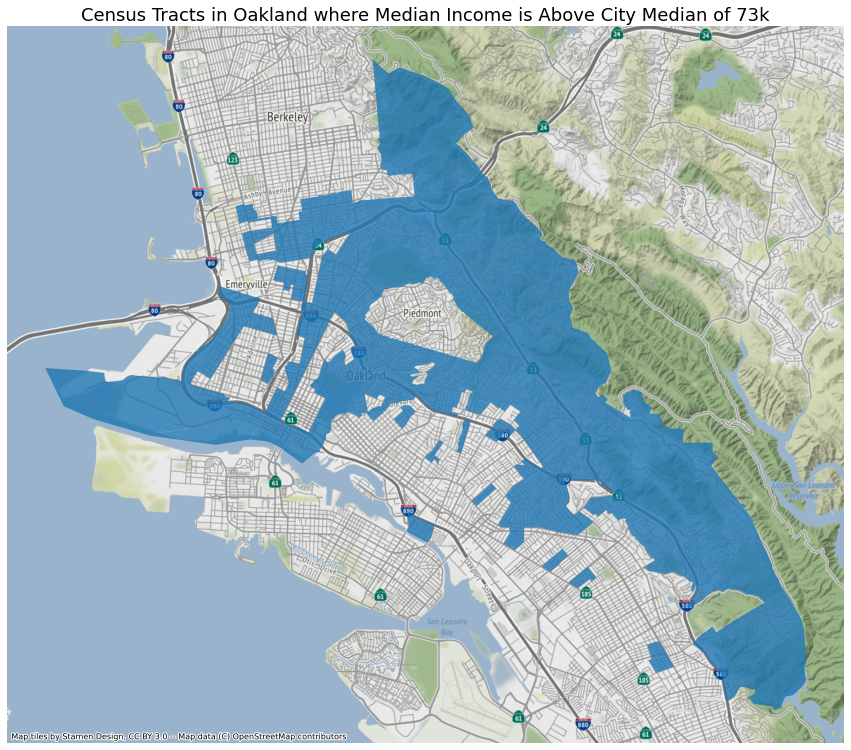

In [20]:
incomeblocks_basemap = incomeblocksgdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15, 15))
incomeblocks_basemap[incomeblocks_basemap['median income'] > 73000].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts in Oakland where Median Income is Above City Median of 73k',fontsize=18)
ctx.add_basemap(ax)

In [23]:
incomeblocks_basemap.to_file("incomeblocksbasemap.geojson",driver='GeoJSON')